In [92]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [93]:
#Dataset sample
dataset = pd.read_csv('history_data.csv')
dataset.head(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"San Diego, CA, United States",04/01/2021,86.6,57.4,71.2,NaN,83.2,0.0,0,0,17.2,217.21,NaN,9.9,59.5,29.91,Partially cloudy
1,"San Diego, CA, United States",04/02/2021,67.3,59.7,63.1,NaN,NaN,0.0,0,0,10.6,214.54,21.9,9.7,53.1,71.53,Partially cloudy
2,"San Diego, CA, United States",04/03/2021,65.8,57.4,60.8,NaN,NaN,0.0,0,0,14.7,278.13,18.3,9.2,52.9,74.61,Partially cloudy
3,"San Diego, CA, United States",04/04/2021,70.8,55.6,62.0,NaN,NaN,0.0,0,0,12.8,256.29,NaN,8.0,71.8,73.37,Partially cloudy
4,"San Diego, CA, United States",04/05/2021,65.4,58.5,61.1,NaN,NaN,0.0,0,0,12.7,239.17,19.7,9.9,77.3,71.76,Overcast


In [94]:
dataset.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
count,230.000000,230.000000,230.000000,0.0,33.000000,230.000000,230.0,230.0,230.000000,230.000000,138.000000,230.000000,230.000000,230.000000
mean,73.068696,63.223478,67.586522,NaN,82.645455,0.007391,0.0,0.0,12.370000,240.511391,20.996377,9.471304,63.676522,69.106913
std,5.877169,5.122275,4.470714,NaN,1.681534,0.045151,0.0,0.0,2.957872,44.375849,2.831507,0.825760,27.403942,8.116310
min,60.600000,51.500000,59.600000,NaN,79.000000,0.000000,0.0,0.0,6.900000,95.550000,16.100000,3.300000,0.000000,29.910000
25%,68.325000,59.400000,63.700000,NaN,81.800000,0.000000,0.0,0.0,10.300000,207.842500,19.625000,9.400000,49.850000,67.122500
50%,72.900000,62.550000,67.900000,NaN,82.500000,0.000000,0.0,0.0,11.500000,238.145000,20.800000,9.800000,69.950000,71.165000
75%,76.700000,67.575000,71.700000,NaN,84.000000,0.000000,0.0,0.0,14.000000,280.187500,21.900000,9.900000,85.500000,73.917500
max,89.200000,72.700000,76.500000,NaN,85.600000,0.410000,0.0,0.0,24.100000,325.330000,34.400000,9.900000,100.000000,82.420000


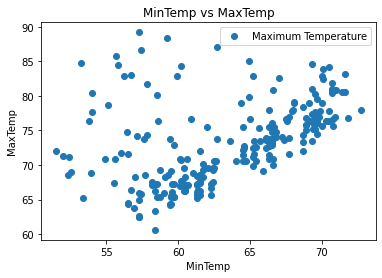

In [95]:
dataset.plot(x='Minimum Temperature', y='Maximum Temperature', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

<AxesSubplot:xlabel='Minimum Temperature', ylabel='Count'>

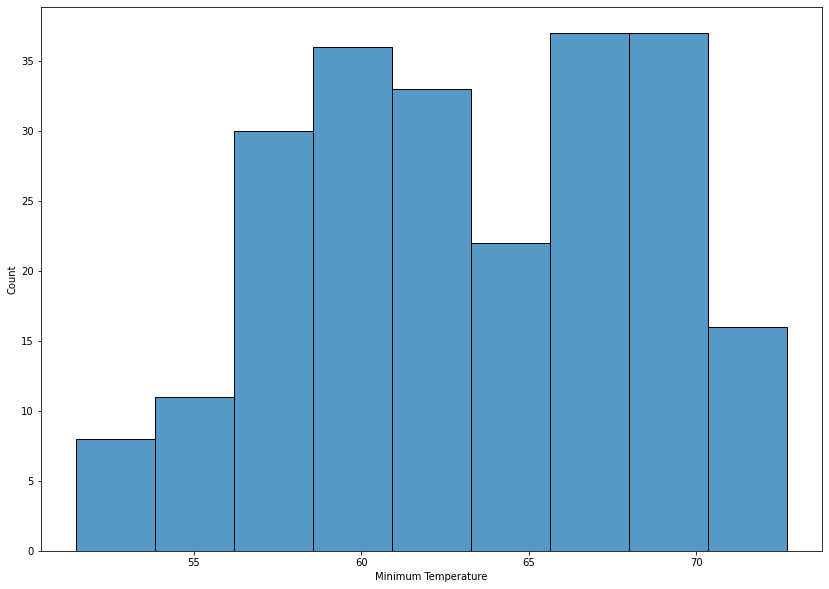

In [96]:
plt.figure(figsize=(14,10))
plt.tight_layout()
seabornInstance.histplot(dataset['Minimum Temperature'])

#we can observe that the Average Minimum Temperature is Between Nearly 66-71.


<AxesSubplot:xlabel='Maximum Temperature', ylabel='Count'>

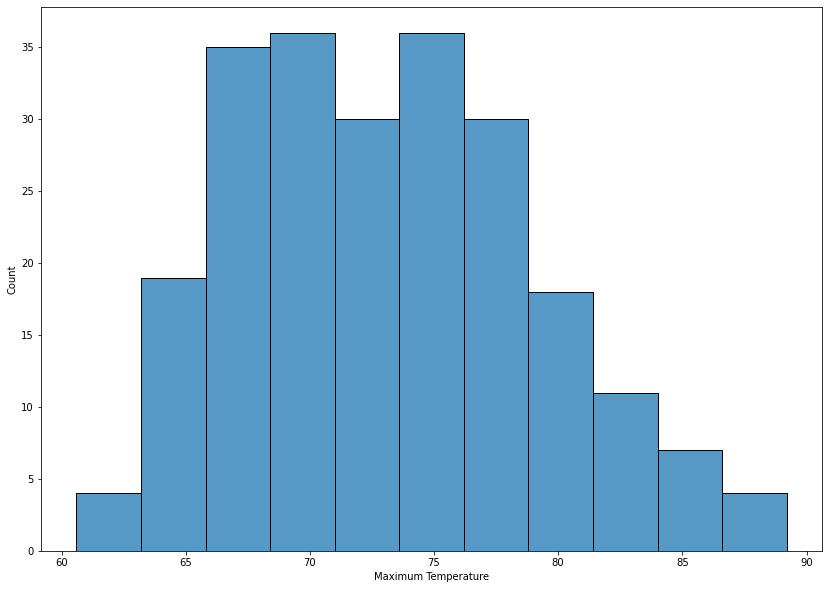

In [97]:
plt.figure(figsize=(14,10))
plt.tight_layout()
seabornInstance.histplot(dataset['Maximum Temperature'])

#we can observe that the Average Maximum Temperature is Between Nearly 69-71 and 76-78.


In [98]:
# We want to predict the Maximum Temp depending upon the Minimum Temp recorded. The “Minimum Temperature” column which is stored in the X variable(independent variable), 
#and the “Maximum Temperature” column which is stored in y variable(Dependent variable).y=mx+c

X = dataset['Minimum Temperature'].values.reshape(-1,1)
y = dataset['Maximum Temperature'].values.reshape(-1,1)

In [41]:
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Lets train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[62.13075698]
[[0.20413973]]


In [43]:
#To make predictions on the test data
y_pred = regressor.predict(X_test)
y_pred

array([[72.80726474],
       [73.52175378],
       [74.64452228],
       [74.07293105],
       [75.74687681],
       [75.58356503],
       [74.17500091],
       [75.80811873],
       [73.50133981],
       [73.76672146],
       [75.72646284],
       [74.72617818],
       [75.72646284],
       [72.64395295],
       [72.82767871],
       [76.56343572]])

In [44]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,68.6,72.807265
1,84.5,73.521754
2,66.1,74.644522
3,67.3,74.072931
4,75.5,75.746877
5,69.1,75.583565
6,65.9,74.175001
7,82.6,75.808119
8,85.7,73.501340
9,68.3,73.766721


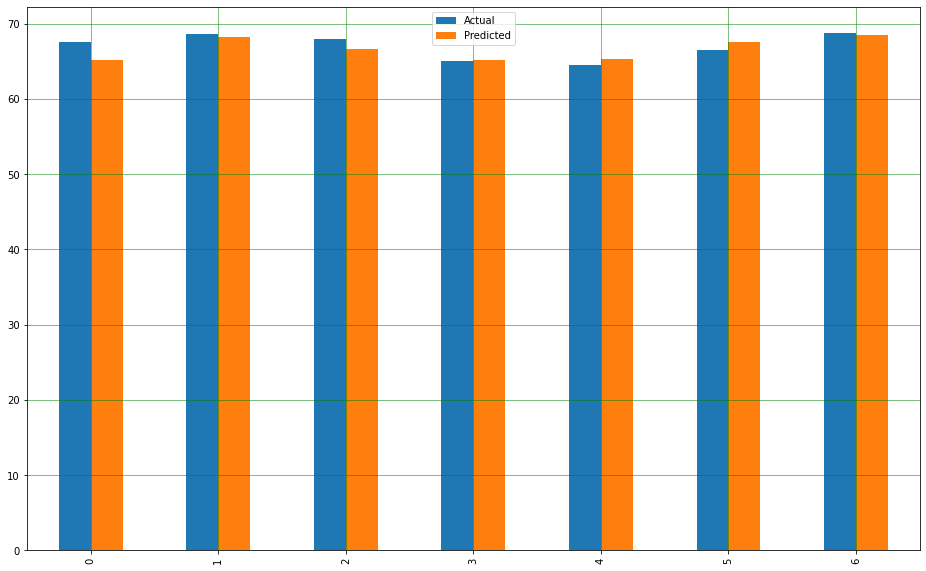

In [30]:
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

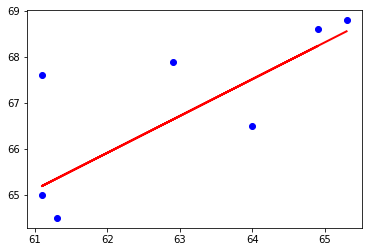

In [34]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.905619818473655
Mean Squared Error: 1.3383453152506408
Root Mean Squared Error: 1.1568687545485188
